<a href="https://colab.research.google.com/github/21Ovi/COVID-19-Time-Series-Prediction/blob/main/COVID_19_TimeSeries_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from plotly.offline import init_notebook_mode, iplot # plotly offline mode
init_notebook_mode(connected=True) 

import plotly.graph_objects as go

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import os
import warnings        
# ignore filters
warnings.filterwarnings("ignore") # if there is a warning after some codes, this will avoid us to see them.
plt.style.use('ggplot')
import datetime

In [ ]:
confirmed_data = pd.read_csv('https://raw.githubusercontent.com/21Ovi/DataScience-DataSets/main/covid-19/dataset/time_series_covid19_confirmed_global.csv')
recovered_data = pd.read_csv('https://raw.githubusercontent.com/21Ovi/DataScience-DataSets/main/covid-19/dataset/time_series_covid19_recovered_global.csv')
death_data = pd.read_csv('https://raw.githubusercontent.com/21Ovi/DataScience-DataSets/main/covid-19/dataset/time_series_covid19_deaths_global.csv')

In [ ]:
confirmed_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38641,38716,38772,38815,38855,38872,38883,38919,39044,39074
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,11185,11353,11520,11672,11816,11948,12073,12226,12385,12535
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,48007,48254,48496,48734,48966,49194,49413,49623,49826,50023
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1344,1344,1438,1438,1483,1483,1564,1564,1564,1681
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,3335,3388,3439,3569,3675,3789,3848,3901,3991,4117


In [ ]:
recovered_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,31234,31638,32073,32098,32503,32505,32576,32576,32576,32576
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,6494,6569,6615,6668,6733,6788,6831,6888,6940,6995
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,33875,34037,34204,34385,34517,34675,34818,34923,35047,35180
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,943,943,945,945,1054,1054,1164,1164,1164,1199
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1289,1301,1324,1332,1401,1405,1443,1445,1445,1449


In [ ]:
death_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1420,1420,1425,1426,1436,1436,1437,1437,1441,1444
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,330,334,338,340,343,347,353,358,362,364
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,1605,1612,1620,1632,1645,1654,1659,1665,1672,1679
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,132,134,136,139,143,144,147,147,152,154


# Basic Checks

In [ ]:
confirmed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 248 entries, Province/State to 9/21/20
dtypes: float64(2), int64(244), object(2)
memory usage: 515.5+ KB


In [ ]:
confirmed_data.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,...,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02
mean,21.076624,22.829441,2.086466,2.458647,3.537594,5.390977,7.962406,11.003759,20.969925,23.180451,...,1.081163e+05,1.090052e+05,1.100551e+05,1.111201e+05,1.122630e+05,1.134410e+05,1.146599e+05,1.157171e+05,1.166240e+05,1.174654e+05
std,24.904600,70.191330,27.279200,27.377862,34.083035,47.434934,66.289178,89.313757,219.187744,220.524977,...,5.678329e+05,5.727452e+05,5.774877e+05,5.831820e+05,5.891235e+05,5.953081e+05,6.017349e+05,6.076737e+05,6.126599e+05,6.154886e+05
min,-51.796300,-135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.677575,-15.277675,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.672500e+02,4.675000e+02,4.675000e+02,4.682500e+02,4.682500e+02,4.707500e+02,4.707500e+02,4.707500e+02,4.707500e+02,4.710000e+02
50%,22.820850,20.921188,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.354500e+03,3.381000e+03,3.397000e+03,3.459000e+03,3.466000e+03,3.522500e+03,3.608000e+03,3.714500e+03,3.772000e+03,3.823500e+03
75%,41.143200,77.913685,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.472475e+04,3.540750e+04,3.553900e+04,3.580200e+04,3.599400e+04,3.639525e+04,3.670825e+04,3.731275e+04,3.781650e+04,3.826325e+04
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,6.485123e+06,6.520122e+06,6.553652e+06,6.592342e+06,6.630051e+06,6.674411e+06,6.723933e+06,6.768119e+06,6.804814e+06,6.856884e+06


In [ ]:
confirmed_cols = confirmed_data.keys()
deaths_cols = death_data.keys()
recovered_cols=recovered_data.keys()


In [ ]:
deaths_cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '9/12/20', '9/13/20', '9/14/20', '9/15/20', '9/16/20', '9/17/20',
       '9/18/20', '9/19/20', '9/20/20', '9/21/20'],
      dtype='object', length=248)

In [ ]:
recovered_cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '9/12/20', '9/13/20', '9/14/20', '9/15/20', '9/16/20', '9/17/20',
       '9/18/20', '9/19/20', '9/20/20', '9/21/20'],
      dtype='object', length=248)

In [ ]:
confirmed_data.rename(columns={'Country/Region':'Country_and_Region'},inplace=True)

In [ ]:
confirmed = confirmed_data.loc[:, confirmed_cols[4]:]
deaths = death_data.loc[:, deaths_cols[4]:]
recovered = recovered_data.loc[:,recovered_cols[4]:]

In [ ]:
confirmed.keys()

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '9/12/20', '9/13/20', '9/14/20', '9/15/20', '9/16/20', '9/17/20',
       '9/18/20', '9/19/20', '9/20/20', '9/21/20'],
      dtype='object', length=244)

In [ ]:
num_dates = len(confirmed.keys())
ck = confirmed.keys()

total_confirmed = []

for i in range(num_dates):
    confirmed_sum = confirmed[ck[i]].sum()
    total_confirmed.append(confirmed_sum)
  

In [ ]:
total_confirmed

[555,
 654,
 941,
 1434,
 2118,
 2927,
 5578,
 6166,
 8234,
 9926,
 12038,
 16787,
 19887,
 23898,
 27643,
 30802,
 34395,
 37129,
 40159,
 42768,
 44810,
 45228,
 60381,
 66908,
 69050,
 71234,
 73269,
 75151,
 75651,
 76211,
 76840,
 78601,
 78981,
 79545,
 80398,
 81375,
 82735,
 84120,
 86013,
 88395,
 90372,
 92957,
 95272,
 98028,
 102018,
 106036,
 109993,
 113946,
 118967,
 126675,
 132450,
 146783,
 157801,
 169032,
 183677,
 199391,
 218683,
 245633,
 275963,
 307709,
 341784,
 384630,
 425787,
 476680,
 539069,
 603910,
 671653,
 731267,
 795997,
 872495,
 948663,
 1030010,
 1113203,
 1193711,
 1265377,
 1338067,
 1415186,
 1498895,
 1585483,
 1672988,
 1749872,
 1846819,
 1916464,
 1986284,
 2067245,
 2163941,
 2251672,
 2325485,
 2406054,
 2479522,
 2554727,
 2631781,
 2720583,
 2807495,
 2892296,
 2965076,
 3034072,
 3109425,
 3186589,
 3270117,
 3357276,
 3438689,
 3516333,
 3592506,
 3672660,
 3762727,
 3851894,
 3943470,
 4029169,
 4105292,
 4181640,
 4265367,
 4350206

In [ ]:
num_dates_confirmed = len(deaths.keys())
dk = deaths.keys()

total_deaths = []

for i in range(num_dates_confirmed):
    death_sum = deaths[dk[i]].sum()
    total_deaths.append(death_sum)

In [ ]:
total_deaths

[17,
 18,
 26,
 42,
 56,
 82,
 131,
 133,
 171,
 213,
 259,
 362,
 426,
 492,
 564,
 634,
 719,
 806,
 906,
 1013,
 1113,
 1118,
 1371,
 1523,
 1666,
 1770,
 1868,
 2008,
 2123,
 2248,
 2252,
 2459,
 2470,
 2630,
 2710,
 2771,
 2814,
 2873,
 2942,
 2996,
 3085,
 3160,
 3255,
 3348,
 3460,
 3559,
 3803,
 3987,
 4267,
 4611,
 4917,
 5414,
 5834,
 6475,
 7153,
 7964,
 8867,
 9981,
 11460,
 13180,
 14854,
 16797,
 19079,
 21877,
 24893,
 28388,
 32102,
 35572,
 39620,
 44365,
 49863,
 56101,
 62205,
 68351,
 73540,
 79481,
 87712,
 94464,
 102237,
 109629,
 115854,
 121671,
 127587,
 134567,
 142918,
 150221,
 158588,
 164601,
 169862,
 175726,
 182917,
 189644,
 196485,
 203142,
 208774,
 212708,
 217382,
 223929,
 230657,
 236559,
 241722,
 247205,
 250694,
 254808,
 260714,
 267277,
 272579,
 278054,
 282287,
 285874,
 289354,
 294889,
 299981,
 305171,
 310304,
 314424,
 317712,
 321412,
 326158,
 330926,
 335657,
 340851,
 344742,
 347870,
 349062,
 353180,
 358326,
 362944,
 367536,


In [ ]:
num_dates_recovered = len(recovered.keys())
rk=recovered.keys()

total_recovered = []

for i in range(num_dates_recovered):
    recovered_sum= recovered[rk[i]].sum()
    total_recovered.append(recovered_sum)

In [ ]:
total_recovered

[28,
 30,
 36,
 39,
 52,
 61,
 107,
 126,
 143,
 222,
 284,
 472,
 623,
 852,
 1124,
 1487,
 2011,
 2616,
 3244,
 3946,
 4683,
 5150,
 6295,
 8058,
 9395,
 10865,
 12583,
 14352,
 16121,
 18177,
 18890,
 22886,
 23394,
 25227,
 27905,
 30384,
 33277,
 36711,
 39782,
 42716,
 45602,
 48228,
 51170,
 53796,
 55865,
 58359,
 60694,
 62493,
 64404,
 67002,
 68324,
 70251,
 72622,
 76032,
 78086,
 80838,
 83321,
 84958,
 87403,
 91670,
 97885,
 98351,
 107992,
 113775,
 122145,
 130921,
 139424,
 148891,
 164337,
 177825,
 192918,
 209967,
 225415,
 245832,
 259672,
 276252,
 299643,
 328359,
 353707,
 375509,
 401766,
 421180,
 448347,
 473436,
 510106,
 540926,
 567049,
 590968,
 622623,
 644613,
 679456,
 709881,
 738661,
 788712,
 816491,
 845096,
 872865,
 906136,
 948318,
 1013284,
 1051537,
 1092416,
 1124732,
 1158819,
 1195359,
 1241365,
 1280833,
 1317383,
 1370933,
 1404527,
 1451521,
 1488542,
 1544398,
 1584114,
 1632122,
 1688714,
 1729621,
 1782542,
 1834647,
 1893575,
 19448

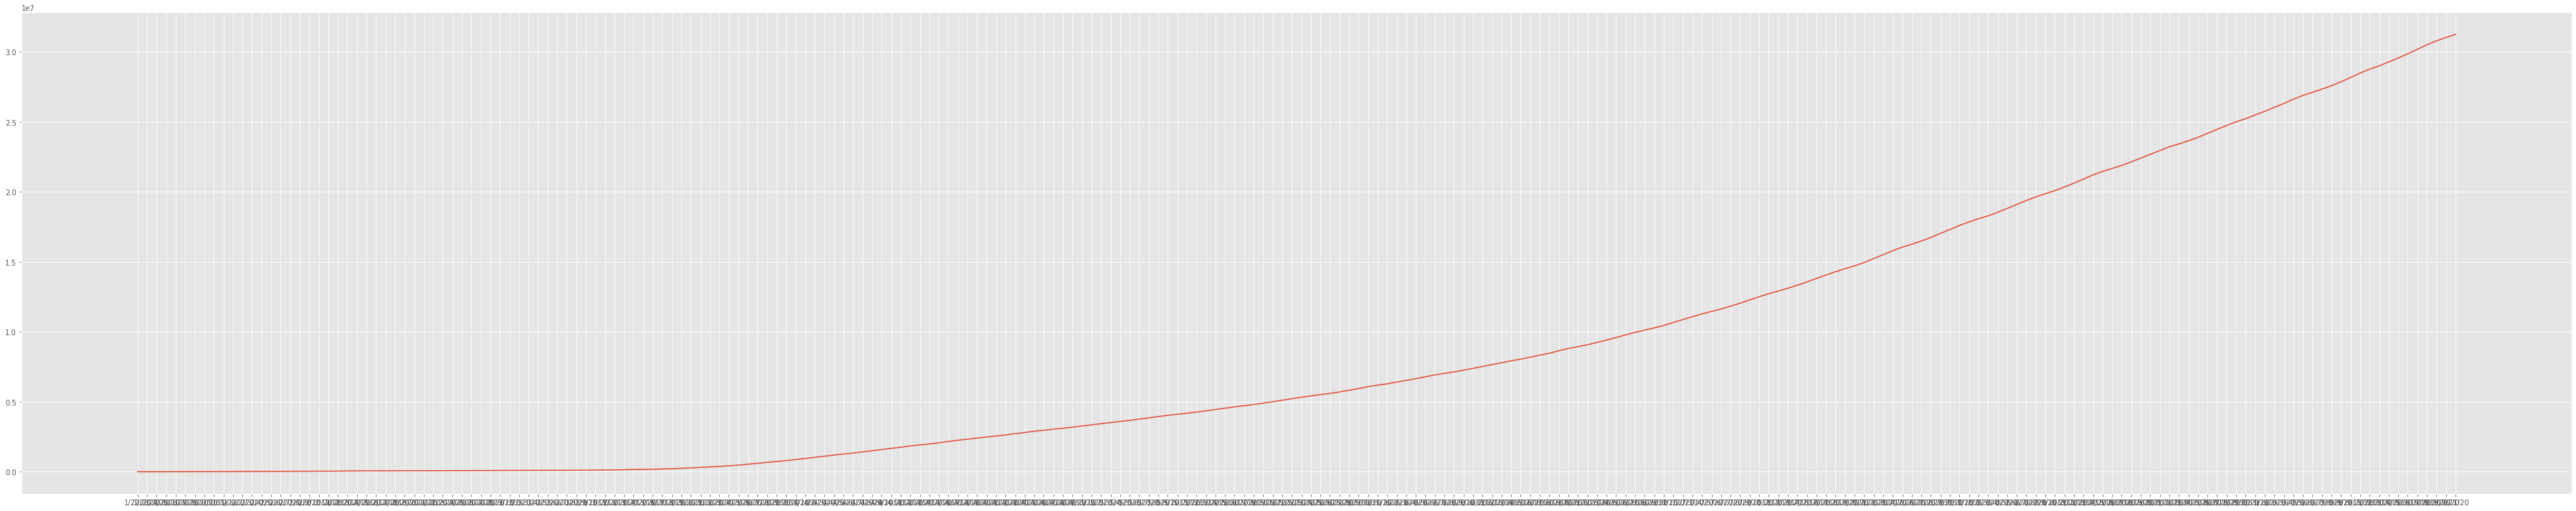

In [ ]:
plt.figure(figsize=(50,10))
ax=plt.plot(ck,total_confirmed)
plt.tight_layout()

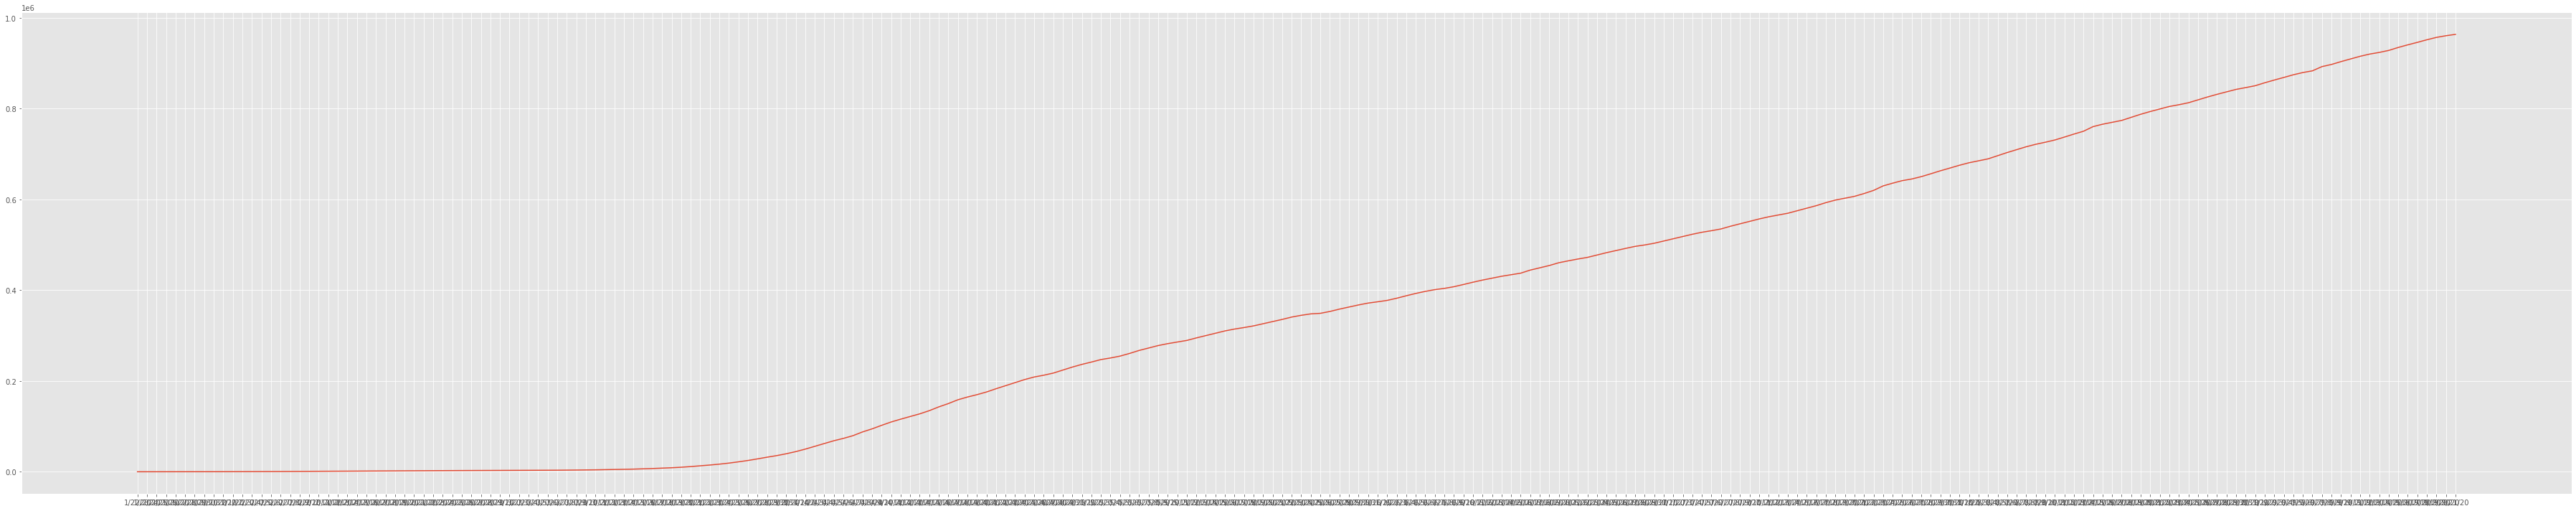

In [ ]:
plt.figure(figsize=(50,10))
ax=plt.plot(dk,total_deaths)
plt.tight_layout()

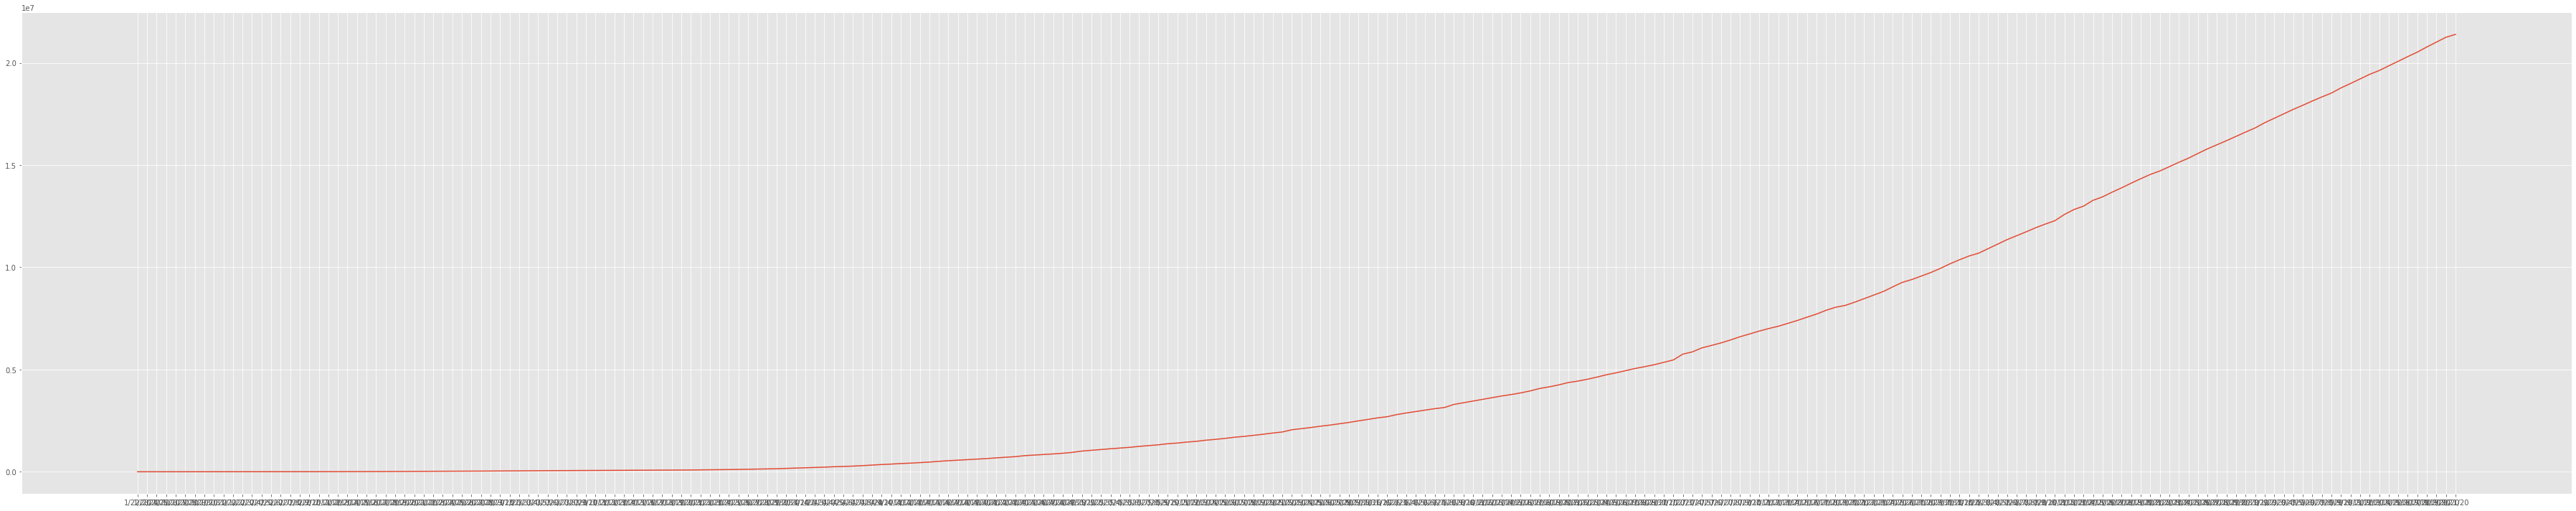

In [ ]:
plt.figure(figsize=(50,10))
ax=sns.lineplot(ck,total_recovered)
plt.tight_layout()

In [ ]:
'''num_dates = len(confirmed.keys())
ck = confirmed.keys()
dk = deaths.keys()
rk=recovered.keys()

world_cases = []
total_deaths = []
total_recovered=[] 
mortality_rate = []


for i in range(num_dates):
    confirmed_sum = confirmed[ck[i]].sum()
    death_sum = deaths[dk[i]].sum()
    recovered_sum= recovered[rk[i]].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    
    # calculate rates
    mortality_rate.append(death_sum/confirmed_sum)'''

'num_dates = len(confirmed.keys())\nck = confirmed.keys()\ndk = deaths.keys()\nrk=recovered.keys()\n\nworld_cases = []\ntotal_deaths = []\ntotal_recovered=[] \nmortality_rate = []\n\n\nfor i in range(num_dates):\n    confirmed_sum = confirmed[ck[i]].sum()\n    death_sum = deaths[dk[i]].sum()\n    recovered_sum= recovered[rk[i]].sum()\n    world_cases.append(confirmed_sum)\n    total_deaths.append(death_sum)\n    total_recovered.append(recovered_sum)\n    \n    # calculate rates\n    mortality_rate.append(death_sum/confirmed_sum)'

In [ ]:
world_cases

[]

In [ ]:
total_deaths

[17,
 18,
 26,
 42,
 56,
 82,
 131,
 133,
 171,
 213,
 259,
 362,
 426,
 492,
 564,
 634,
 719,
 806,
 906,
 1013,
 1113,
 1118,
 1371,
 1523,
 1666,
 1770,
 1868,
 2008,
 2123,
 2248,
 2252,
 2459,
 2470,
 2630,
 2710,
 2771,
 2814,
 2873,
 2942,
 2996,
 3085,
 3160,
 3255,
 3348,
 3460,
 3559,
 3803,
 3987,
 4267,
 4611,
 4917,
 5414,
 5834,
 6475,
 7153,
 7964,
 8867,
 9981,
 11460,
 13180,
 14854,
 16797,
 19079,
 21877,
 24893,
 28388,
 32102,
 35572,
 39620,
 44365,
 49863,
 56101,
 62205,
 68351,
 73540,
 79481,
 87712,
 94464,
 102237,
 109629,
 115854,
 121671,
 127587,
 134567,
 142918,
 150221,
 158588,
 164601,
 169862,
 175726,
 182917,
 189644,
 196485,
 203142,
 208774,
 212708,
 217382,
 223929,
 230657,
 236559,
 241722,
 247205,
 250694,
 254808,
 260714,
 267277,
 272579,
 278054,
 282287,
 285874,
 289354,
 294889,
 299981,
 305171,
 310304,
 314424,
 317712,
 321412,
 326158,
 330926,
 335657,
 340851,
 344742,
 347870,
 349062,
 353180,
 358326,
 362944,
 367536,


In [ ]:
total_recovered

[28,
 30,
 36,
 39,
 52,
 61,
 107,
 126,
 143,
 222,
 284,
 472,
 623,
 852,
 1124,
 1487,
 2011,
 2616,
 3244,
 3946,
 4683,
 5150,
 6295,
 8058,
 9395,
 10865,
 12583,
 14352,
 16121,
 18177,
 18890,
 22886,
 23394,
 25227,
 27905,
 30384,
 33277,
 36711,
 39782,
 42716,
 45602,
 48228,
 51170,
 53796,
 55865,
 58359,
 60694,
 62493,
 64404,
 67002,
 68324,
 70251,
 72622,
 76032,
 78086,
 80838,
 83321,
 84958,
 87403,
 91670,
 97885,
 98351,
 107992,
 113775,
 122145,
 130921,
 139424,
 148891,
 164337,
 177825,
 192918,
 209967,
 225415,
 245832,
 259672,
 276252,
 299643,
 328359,
 353707,
 375509,
 401766,
 421180,
 448347,
 473436,
 510106,
 540926,
 567049,
 590968,
 622623,
 644613,
 679456,
 709881,
 738661,
 788712,
 816491,
 845096,
 872865,
 906136,
 948318,
 1013284,
 1051537,
 1092416,
 1124732,
 1158819,
 1195359,
 1241365,
 1280833,
 1317383,
 1370933,
 1404527,
 1451521,
 1488542,
 1544398,
 1584114,
 1632122,
 1688714,
 1729621,
 1782542,
 1834647,
 1893575,
 19448

In [ ]:
recovered[rk[i]]

0      32576
1       6995
2      35180
3       1199
4       1449
       ...  
248    24428
249        8
250     1235
251    13629
252     5924
Name: 9/21/20, Length: 253, dtype: int64

In [ ]:
deaths[dk[i]]

0      1444
1       364
2      1679
3        53
4       154
       ... 
261     265
262       1
263     586
264     331
265     225
Name: 9/21/20, Length: 266, dtype: int64

ValueError: ignored

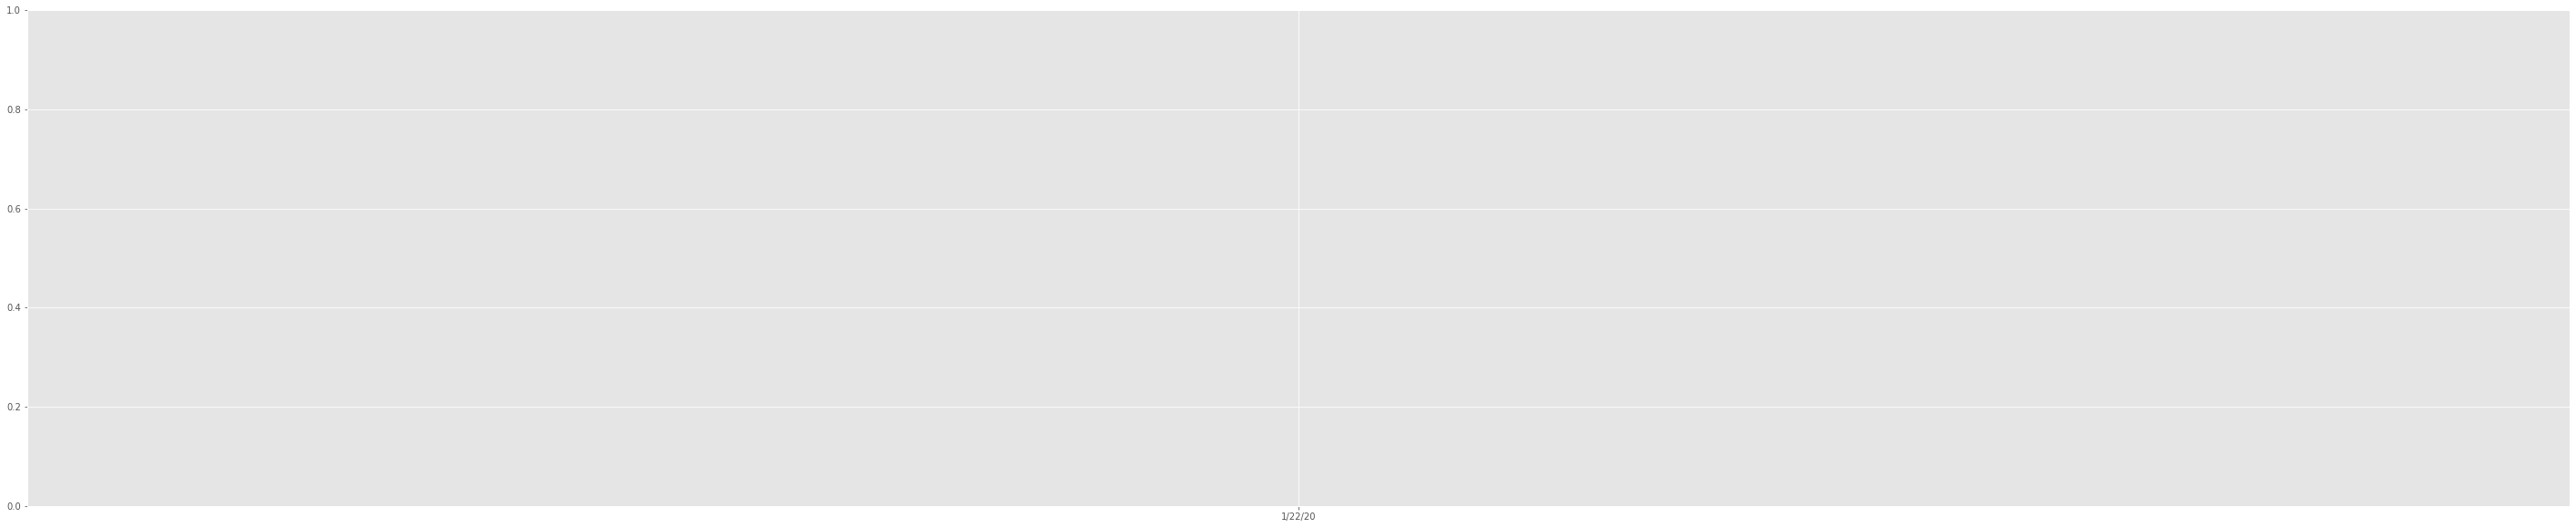

In [ ]:
plt.figure(figsize=(50,10))
ax=plt.plot(ck,world_cases)
plt.tight_layout()

In [ ]:
plt.figure(figsize=(50,10))
ax=plt.plot(dk,total_deaths)
plt.tight_layout()

In [ ]:
plt.figure(figsize=(50,10))
ax=plt.plot(rk,total_recovered)
plt.tight_layout()

In [ ]:
plt.figure(figsize=(50,10))
ax=sns.lineplot(ck,total_recovered)
plt.tight_layout()

In [ ]:
total_recovered

In [ ]:
confirmed_data.rename(columns={'Country/Region':'Country_and_Region'},inplace=True)

In [ ]:
#pip install plotly

In [ ]:
confirmed_data.drop('Province/State',axis=1,inplace=True)

In [ ]:
confirmed_data.drop('Lat',axis=1,inplace=True)

In [ ]:
confirmed_data.drop('Long',axis=1,inplace=True)

In [ ]:
confirmed_data.head()

In [ ]:
death_data_cols= death_data.keys()
death_data_cols

In [ ]:
confirmed_cols = confirmed_data.keys()
confirmed_cols

In [ ]:
num_dates = len(confirmed_data.keys())
ck = confirmed_data.keys()
dk = death_data.keys()

world_cases = []
total_deaths = [] 
mortality_rate = []


for i in range(num_dates):
    confirmed_sum = confirmed_data[ck[i]].sum()
    death_sum = death_data[dk[i]].sum()
    
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    
    # calculate rates
    mortality_rate.append(death_sum/confirmed_sum)

In [ ]:
#change column to index
'''confirmed_data= confirmed_data.set_index(['1/22/20',
       '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20',
       '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20',
       '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20',
       '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20',
       '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20',
       '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20',
       '3/23/20', '3/24/20', '3/25/20', '3/26/20', '3/27/20', '3/28/20',
       '3/29/20', '3/30/20', '3/31/20', '4/1/20', '4/2/20', '4/3/20',
       '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20', '4/9/20',
       '4/10/20', '4/11/20', '4/12/20', '4/13/20', '4/14/20', '4/15/20',
       '4/16/20', '4/17/20', '4/18/20', '4/19/20', '4/20/20', '4/21/20',
       '4/22/20', '4/23/20', '4/24/20', '4/25/20', '4/26/20', '4/27/20',
       '4/28/20', '4/29/20', '4/30/20', '5/1/20', '5/2/20', '5/3/20',
       '5/4/20', '5/5/20', '5/6/20', '5/7/20', '5/8/20', '5/9/20',
       '5/10/20', '5/11/20', '5/12/20', '5/13/20', '5/14/20', '5/15/20',
       '5/16/20', '5/17/20', '5/18/20', '5/19/20', '5/20/20', '5/21/20',
       '5/22/20', '5/23/20', '5/24/20', '5/25/20', '5/26/20', '5/27/20',
       '5/28/20', '5/29/20', '5/30/20', '5/31/20', '6/1/20', '6/2/20',
       '6/3/20', '6/4/20', '6/5/20', '6/6/20', '6/7/20', '6/8/20',
       '6/9/20', '6/10/20', '6/11/20', '6/12/20', '6/13/20', '6/14/20',
       '6/15/20', '6/16/20', '6/17/20', '6/18/20', '6/19/20', '6/20/20',
       '6/21/20', '6/22/20', '6/23/20', '6/24/20', '6/25/20', '6/26/20',
       '6/27/20', '6/28/20', '6/29/20', '6/30/20', '7/1/20', '7/2/20',
       '7/3/20', '7/4/20', '7/5/20', '7/6/20', '7/7/20', '7/8/20',
       '7/9/20', '7/10/20', '7/11/20', '7/12/20', '7/13/20', '7/14/20',
       '7/15/20', '7/16/20', '7/17/20', '7/18/20', '7/19/20', '7/20/20',
       '7/21/20', '7/22/20', '7/23/20', '7/24/20', '7/25/20', '7/26/20',
       '7/27/20', '7/28/20', '7/29/20', '7/30/20', '7/31/20', '8/1/20',
       '8/2/20', '8/3/20', '8/4/20', '8/5/20', '8/6/20', '8/7/20',
       '8/8/20', '8/9/20', '8/10/20', '8/11/20', '8/12/20', '8/13/20',
       '8/14/20', '8/15/20', '8/16/20', '8/17/20', '8/18/20', '8/19/20',
       '8/20/20', '8/21/20', '8/22/20', '8/23/20', '8/24/20', '8/25/20',
       '8/26/20', '8/27/20', '8/28/20', '8/29/20', '8/30/20', '8/31/20',
       '9/1/20', '9/2/20', '9/3/20', '9/4/20', '9/5/20', '9/6/20',
       '9/7/20', '9/8/20', '9/9/20', '9/10/20', '9/11/20', '9/12/20',
       '9/13/20', '9/14/20', '9/15/20', '9/16/20', '9/17/20', 
       '9/18/20','9/19/20', '9/20/20', '9/21/20'])'''

In [ ]:
confirmed_data.head()

In [ ]:
#confirmed_data.rename(columns={'Country/Region':'Country_and_Region'},inplace=True)

In [ ]:
#confirmed_data.Country_and_Region.value_counts()

In [ ]:
#plt.figure(figsize=(25,8))
#ax=sns.countplot(x='Country_and_Region',data=confirmed_data);

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

In [ ]:
plot_acf(confirmed_data[])